# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [6]:
cities

['muromtsevo',
 'puerto ayora',
 'grytviken',
 'deming',
 'kirakira',
 'garoowe',
 'kapuskasing',
 'huilong',
 'funafuti',
 'chifeng',
 'hamilton',
 'waitangi',
 'tralee',
 'port moresby',
 'college',
 'nushki',
 "nar'yan-mar",
 'edinburgh of the seven seas',
 'atafu village',
 'baranchinskiy',
 'adamstown',
 'stanley',
 'margaret river',
 'port-aux-francais',
 'kushiro',
 'kirensk',
 'novyy urengoy',
 'hermanus',
 'kitakami',
 'saint-leu',
 'anadyr',
 'kingston',
 'aasiaat',
 'puerto natales',
 'beyneu',
 "muzayri'",
 'east london',
 'badger',
 'churapcha',
 'kamloops',
 'lihue',
 'taoudenni',
 'dellys',
 'coquimbo',
 'mili',
 'achinsk',
 'mariental',
 'huarmey',
 'bendale',
 'marechal candido rondon',
 'port lincoln',
 "'ohonua",
 'brookings',
 'olonkinbyen',
 'rio grande',
 'west island',
 'yellowknife',
 'la passe',
 'bilibino',
 'umm kaddadah',
 'samut sakhon',
 'vilyuchinsk',
 'khandyga',
 'ilulissat',
 'thompson',
 'ta`u',
 'lompoc',
 'portland',
 'klyuchi',
 'whitehorse',
 'fuv

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust'-ilimsk
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | tieli
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | santo domingo petapa
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | shahrak
Processing Record 14 of Set 1 | roja
Processing Record 15 of Set 1 | quesada
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | maintirano
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | alotau
City not found. Skipping...
Processing Record 22 of Set 1 | qamd

Processing Record 40 of Set 4 | vitoria da conquista
Processing Record 41 of Set 4 | hamilton
Processing Record 42 of Set 4 | ust-nera
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | freetown
Processing Record 45 of Set 4 | kelaat mgouna
City not found. Skipping...
Processing Record 46 of Set 4 | viqueque
Processing Record 47 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 48 of Set 4 | usinsk
Processing Record 49 of Set 4 | whangarei
Processing Record 0 of Set 5 | horta
Processing Record 1 of Set 5 | buriti dos lopes
Processing Record 2 of Set 5 | sint michiel liber
Processing Record 3 of Set 5 | safotu
Processing Record 4 of Set 5 | dudinka
Processing Record 5 of Set 5 | petropavlovsk-kamchatsky
Processing Record 6 of Set 5 | szigetvar
Processing Record 7 of Set 5 | arkhangel'sk
Processing Record 8 of Set 5 | tralee
Processing Record 9 of Set 5 | kurmuk
Processing Record 10 of Set 5 | mandali
Processing Record 11 of Set 5 | namibe
Pr

Processing Record 33 of Set 8 | khorugh
Processing Record 34 of Set 8 | olyokminsk
Processing Record 35 of Set 8 | plastun
Processing Record 36 of Set 8 | otjiwarongo
Processing Record 37 of Set 8 | puerto lleras
Processing Record 38 of Set 8 | labasa
Processing Record 39 of Set 8 | mermoz boabab
Processing Record 40 of Set 8 | tapachula
Processing Record 41 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 42 of Set 8 | shinas
Processing Record 43 of Set 8 | temozon
Processing Record 44 of Set 8 | sinabang
Processing Record 45 of Set 8 | carmo do paranaiba
Processing Record 46 of Set 8 | jean-rabel
Processing Record 47 of Set 8 | lamar
Processing Record 48 of Set 8 | ambon
Processing Record 49 of Set 8 | minas de matahambre
City not found. Skipping...
Processing Record 0 of Set 9 | coronel dorrego
Processing Record 1 of Set 9 | sabang
Processing Record 2 of Set 9 | caorle
Processing Record 3 of Set 9 | belyy yar
Processing Record 4 of Set 9 | anibare
City not 

Processing Record 23 of Set 12 | kargalinskaya
Processing Record 24 of Set 12 | myanaung
Processing Record 25 of Set 12 | nuuk
Processing Record 26 of Set 12 | zeya
Processing Record 27 of Set 12 | ha'il
Processing Record 28 of Set 12 | cedeira
Processing Record 29 of Set 12 | ylitornio
Processing Record 30 of Set 12 | kashgar
Processing Record 31 of Set 12 | yuzhno-kurilsk
Processing Record 32 of Set 12 | mili
Processing Record 33 of Set 12 | am djarass
City not found. Skipping...
Processing Record 34 of Set 12 | shwebo
Processing Record 35 of Set 12 | villa de cos
Processing Record 36 of Set 12 | orcopampa
Processing Record 37 of Set 12 | medvezh'yegorsk
Processing Record 38 of Set 12 | mezhdurechenskiy
Processing Record 39 of Set 12 | novodvinsk
Processing Record 40 of Set 12 | hayma'
City not found. Skipping...
Processing Record 41 of Set 12 | garoowe
Processing Record 42 of Set 12 | pedernales
Processing Record 43 of Set 12 | road town
Processing Record 44 of Set 12 | busko-zdroj


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust'-ilimsk,58.0006,102.6619,2.79,87,66,1.89,RU,1694380400
1,iqaluit,63.7506,-68.5145,6.85,75,75,3.60,CA,1694380400
2,blackmans bay,-43.0167,147.3167,1.52,93,71,2.47,AU,1694380401
3,adamstown,-25.0660,-130.1015,21.31,89,23,7.40,PN,1694380401
4,waitangi,-43.9535,-176.5597,12.68,88,32,5.36,NZ,1694380401


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Resources/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust'-ilimsk,58.0006,102.6619,2.79,87,66,1.89,RU,1694380400
1,iqaluit,63.7506,-68.5145,6.85,75,75,3.60,CA,1694380400
2,blackmans bay,-43.0167,147.3167,1.52,93,71,2.47,AU,1694380401
3,adamstown,-25.0660,-130.1015,21.31,89,23,7.40,PN,1694380401
4,waitangi,-43.9535,-176.5597,12.68,88,32,5.36,NZ,1694380401


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

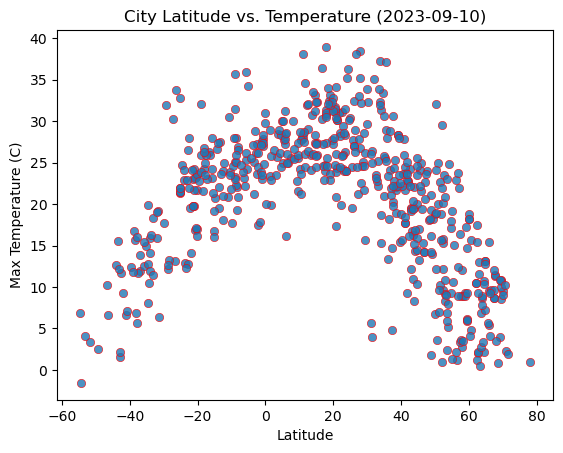

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=.5,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("Resources/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

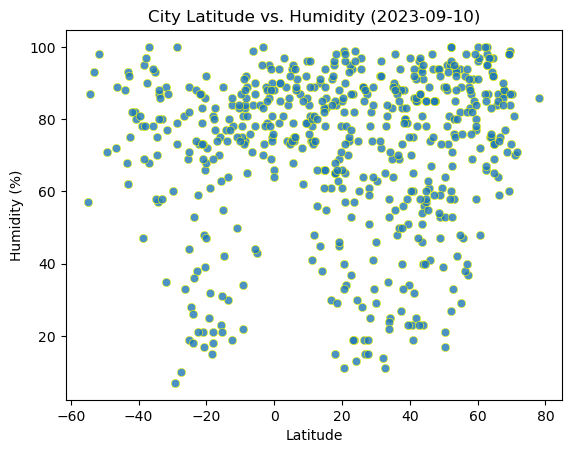

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="yellow",
    linewidths=.5,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Resources/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

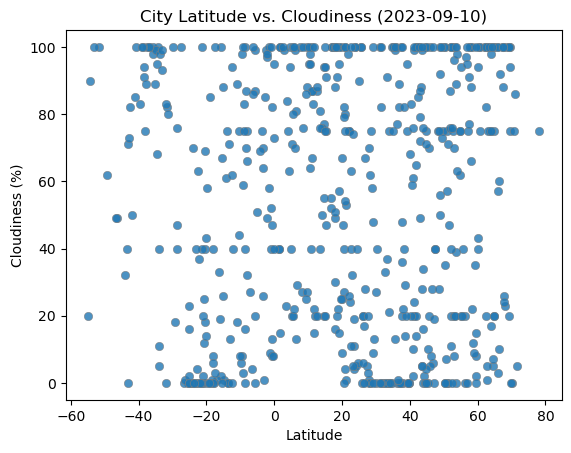

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="gray",
    linewidths=.5,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Resources/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

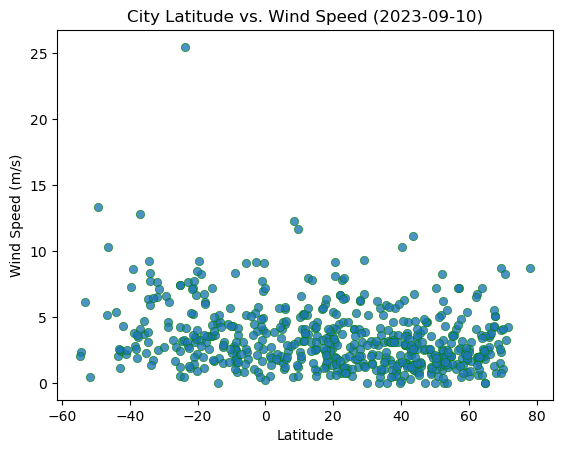

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="green",
    linewidths=.5,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("Resources/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
        
    # Linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
    
    
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust'-ilimsk,58.0006,102.6619,2.79,87,66,1.89,RU,1694380400
1,iqaluit,63.7506,-68.5145,6.85,75,75,3.60,CA,1694380400
5,hawaiian paradise park,19.5933,-154.9731,27.71,78,100,2.57,US,1694380401
6,tieli,46.9500,128.0500,14.17,94,6,2.52,CN,1694380401
7,sitka,57.0531,-135.3300,21.94,37,75,7.20,US,1694380317


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,1.52,93,71,2.47,AU,1694380401
3,adamstown,-25.0660,-130.1015,21.31,89,23,7.40,PN,1694380401
4,waitangi,-43.9535,-176.5597,12.68,88,32,5.36,NZ,1694380401
16,maintirano,-18.0667,44.0167,24.17,81,8,1.15,MG,1694380404
18,grytviken,-54.2811,-36.5092,-1.56,87,90,2.34,GS,1694380404


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.5665186415226584


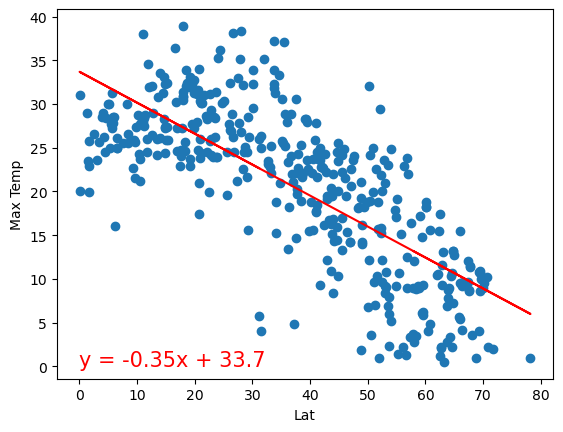

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (0, 0))

The r-value is 0.5864886399042232


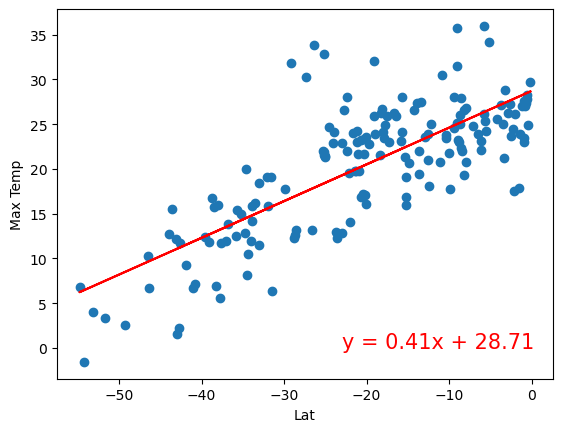

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-23, 0))

**Discussion about the linear relationship:** 
- As demonstrated by the regression modeling above, maximum temperatures tend to rise as latitudes move closer to the equator. 
- Max temperatures are lower at lower latitudes, closer to the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.004728487464337151


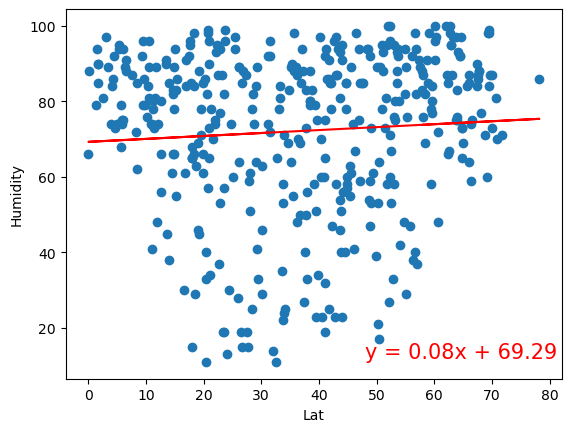

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (48, 12))

The r-value is 3.097762775505574e-08


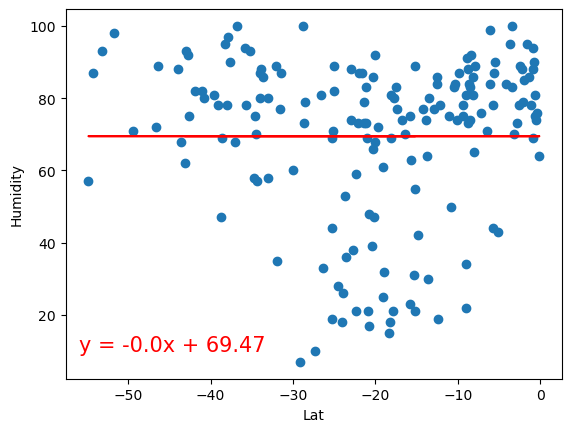

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-56, 10))

**Discussion about the linear relationship:** 
- Per the data, humidity levels tend to be greater between 70N and 40S.
- However, our data seems to skew heavily to the Northern Hemisphere.  This makes some sense, as there is more landmass in the Northern Hemisphere, and there are more cities to report the data.
- The humidity numbers combined with the Max Temp models appear to show us that colder air has a harder time holding moisture.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0005919594794382616


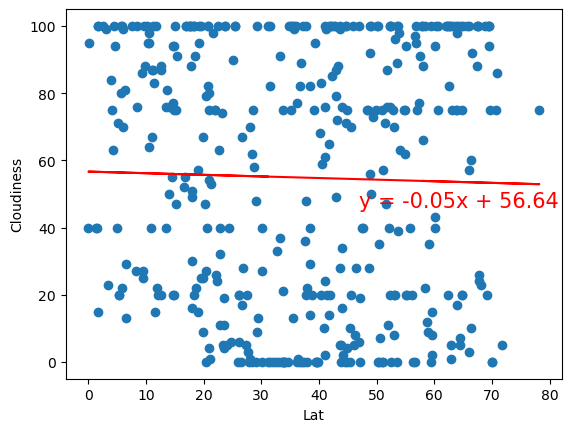

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (47, 46))

The r-value is 0.025401066562581266


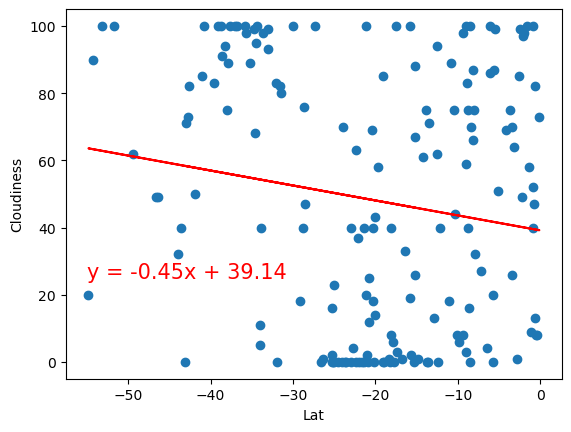

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 25))

**Discussion about the linear relationship:** 
- In the Northern Hemisphere, the model seems to show a more even distribution between Cloudiness and Clear Skies than might be suggested by the NH Humidity table. 
- In the Southern Hemisphere, the data, at first glance, appears to be at odds with the humidity table, but might be explained by natural processes.  We see that between 10S and 30S, there is a concentration of data suggesting low to zero cloudiness, but looking at the SH humidity table, this seems to be an area of reasonably high humidity.  
    - This data could be telling us that these are areas of evaporation, but not condensation.  That the temperatures are warm enough to evaporate water, but perhaps too warm for cloud formation, leading the vapor to form elsewhere.

- A commonality we see between the cloudiness and humidity models is that again, the atmosphere has a harder time holding moisture beyond 70 degrees from the equator (the data from the southern hemisphere only shows a few data points beyond 50S).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.011527868612157696


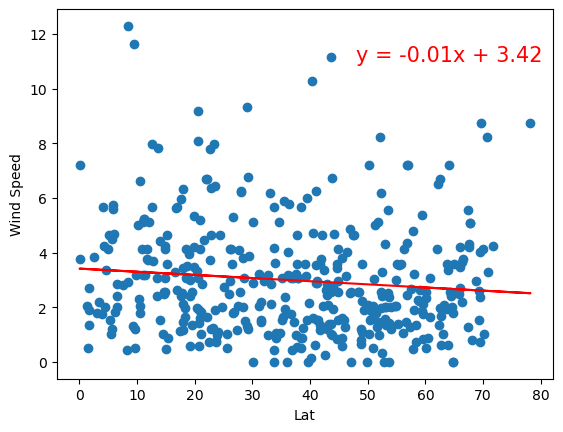

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (48, 11))

The r-value is 0.020402023637554455


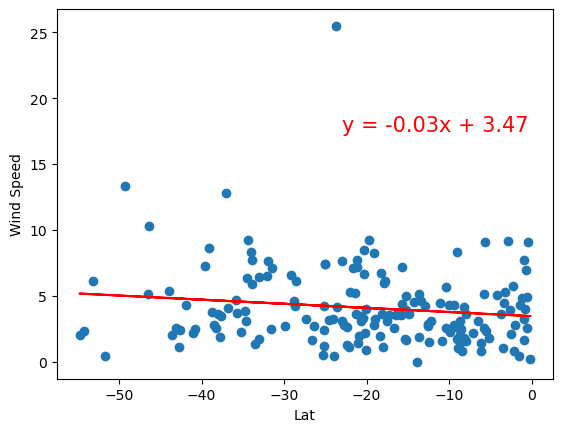

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-23, 17.5))

**Discussion about the linear relationship:** 
- According to the data, wind speeds seem to be generally more consistent, with most values falling between 0 and 10 mph, regardless of latitude.
- The Southern Hemisphere appears to be slightly windier, and the Northern shows more variation. 
- Winds tend to blow from areas of High Pressure to Low Pressure.  Higher pressure is generally associated with higher temperatures. That being the case, at first we might expect the Wind Speed charts to align with the Max Temp charts, however air circulation is a self regulating system, so normalized wind speeds, as shown by the data make sense.